# Divergence, curl module and other field vector field parameters

This document present some examples of vector field processing using pygsf methods.

## Preliminary settings

In order to plot fields, we run the following commands:

In [274]:
%matplotlib inline
import matplotlib.pyplot as plt

The plot codes are modified from [1] as answered by *nicoguaro*.

The modules to import for dealing with grids are:

In [275]:
from pygsf.mathematics.arrays import *

In [276]:
from pygsf.mathematics.geotransform import *

In [277]:
from pygsf.mathematics.mapping import *

## Divergence in 2D

The definition of divergence for our 2D case is:

\begin{align}
divergence = \nabla \cdot \vec{\mathbf{v}} & = \frac{\partial{v_x}}{\partial x} + \frac{\partial{v_y}}{\partial y}
\end{align}

## Curl module in 2D

The definition of curl module in our 2D case is:

\begin{equation*}
\nabla \times \vec{\mathbf{v}} =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial }{\partial x} &  \frac{\partial }{\partial y} & \frac{\partial }{\partial z} \\
{v_x} &  {v_y} & 0
\end{vmatrix}
\end{equation*}

so that the module of the curl is:

\begin{equation*}
 |curl| = \frac{\partial v_y}{\partial x} - \frac{\partial v_x}{\partial y}
\end{equation*}

The implementation of the curl module calculation has been debugged using the code at [2]  by Johnny Lin. Deviations from the expected theoretical values are the same for both implementations.

## Vector field parameters: example 1

We calculate a theoretical, 2D vector field and check that the parameters calculated by *pygsf* is equal to the expected one.

We use a modified example from p. 67 in [3].

\begin{equation*}
 \vec{\mathbf{v}} = 0.0001 x y^3  \vec{\mathbf{i}} - 0.0002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}



In order to create the two grids that represent the x- and the y-components, we therefore define the following two "transfer" functions from coordinates to z values: 

In [278]:
def z_func_fx(x, y):

    return 0.0001 * x * y**3

def z_func_fy(x, y):

    return - 0.0002 * x**2 * y

The above functions define the value of the cells, using the given x and y geographic coordinates.

### geotransform and grid definitions

Gridded field values are calculated for the theoretical source vector field x- and y- components using the provided number of rows and columns for the grid:

In [279]:
rows=100; cols=200

In [280]:
size_x = 10; size_y = 10

In [281]:
tlx = 500.0; tly = 250.0 

Arrays components are defined in terms of indices *i* and *j*, so to transform array indices to geographical coordinates we use a geotransform. The one chosen is:

In [282]:
gt1 = GeoTransform(
    inTopLeftX=tlx, 
    inTopLeftY=tly, 
    inPixWidth=size_x, 
    inPixHeight=size_y)

Note that the chosen geotransform has no axis rotation, as is in the most part of cases with geographic grids.

### vector field x-component

In [283]:
fx1 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fx)

In [284]:
print(fx1)

[[ 7.42659312e+05  7.57365438e+05  7.72071563e+05 ...  3.63976594e+06
   3.65447206e+06  3.66917819e+06]
 [ 6.55382688e+05  6.68360562e+05  6.81338438e+05 ...  3.21202406e+06
   3.22500194e+06  3.23797981e+06]
 [ 5.75226562e+05  5.86617188e+05  5.98007812e+05 ...  2.81917969e+06
   2.83057031e+06  2.84196094e+06]
 ...
 [-1.92444453e+07 -1.96255234e+07 -2.00066016e+07 ... -9.43168359e+07
  -9.46979141e+07 -9.50789922e+07]
 [-2.00518014e+07 -2.04488668e+07 -2.08459322e+07 ... -9.82736803e+07
  -9.86707457e+07 -9.90678111e+07]
 [-2.08814281e+07 -2.12949217e+07 -2.17084153e+07 ... -1.02339672e+08
  -1.02753166e+08 -1.03166659e+08]]


### vector field y-component

In [285]:
fy1 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fy)

In [286]:
print(fy1)

[[ -12496.225  -12996.025  -13505.625 ... -300155.625 -302586.025
  -305026.225]
 [ -11986.175  -12465.575  -12954.375 ... -287904.375 -290235.575
  -292576.175]
 [ -11476.125  -11935.125  -12403.125 ... -275653.125 -277885.125
  -280126.125]
 ...
 [  36978.625   38457.625   39965.625 ...  888215.625  895407.625
   902628.625]
 [  37488.675   38988.075   40516.875 ...  900466.875  907758.075
   915078.675]
 [  37998.725   39518.525   41068.125 ...  912718.125  920108.525
   927528.725]]


### flow characteristics: magnitude and streamlines

To visualize the parameters of the flow, we calculate the geographic coordinates:

In [287]:
X, Y = gtToXY(
    gt=gt1,
    num_rows=rows,
    num_cols=cols)

and the vector field magnitude:

In [288]:
magn = magnitude_2D(
    fld_x=fx1, 
    fld_y=fy1)

We can then visualize it:

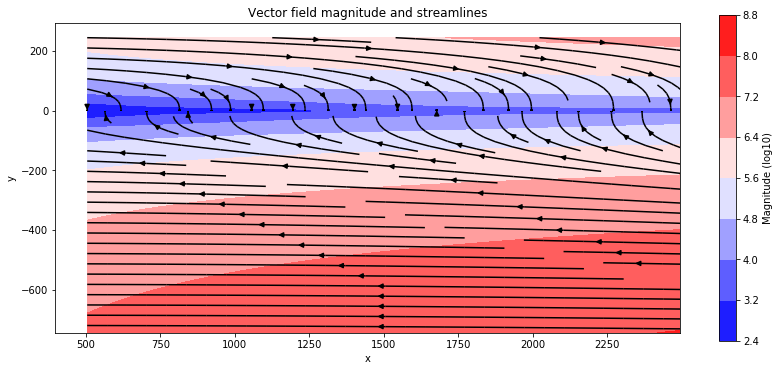

In [289]:
plt.figure(figsize=(14, 6))

plt.contourf(X, Y, np.log10(magn), cmap="bwr")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Magnitude (log10)')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field magnitude and streamlines')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### theoretical divergence

Since the vector field formula is:

\begin{equation*}
 \vec{\mathbf{v}} = 0.0001 x y^3  \vec{\mathbf{i}} - 0.0002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}

the theoretical divergence transfer function is:

In [290]:
def z_func_div(x, y):
    
    return 0.0001 * y**3 - 0.0002 * x**2

The theoretical divergence field can be created using the function expressing the analytical derivatives *z_func_div*:

In [291]:
theor_div = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_div)

In [292]:
print(theor_div)

[[  1419.6075   1417.5675   1415.4875 ...    245.4875    235.5675
     225.6075]
 [  1246.7825   1244.7425   1242.6625 ...     72.6625     62.7425
      52.7825]
 [  1088.0575   1086.0175   1083.9375 ...    -86.0625    -95.9825
    -105.9425]
 ...
 [-38158.8175 -38160.8575 -38162.9375 ... -39332.9375 -39342.8575
  -39352.8175]
 [-39757.5425 -39759.5825 -39761.6625 ... -40931.6625 -40941.5825
  -40951.5425]
 [-41400.3675 -41402.4075 -41404.4875 ... -42574.4875 -42584.4075
  -42594.3675]]


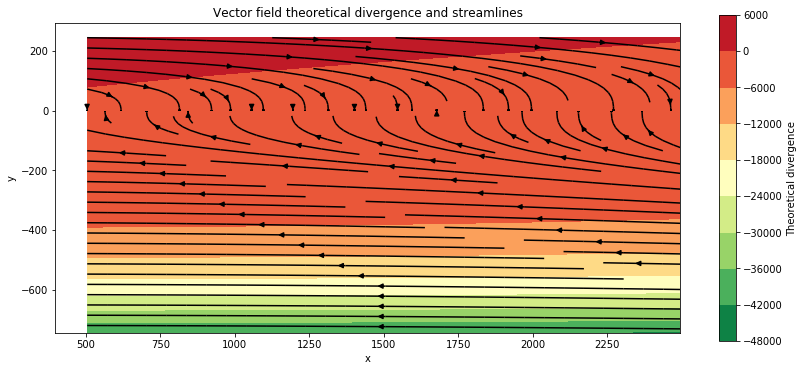

In [293]:
plt.figure(figsize=(14, 6))

plt.contourf(X, Y, theor_div, cmap="RdYlGn_r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Theoretical divergence')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field theoretical divergence and streamlines')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### pygsf-estimated divergence

Divergence as resulting from pygsf calculation:

In [294]:
div = divergence_2D(
    fld_x=fx1, 
    fld_y=fy1, 
    cell_size_x=size_x, 
    cell_size_y=size_y)

In [295]:
print(div)

[[  1419.6075   1417.5675   1415.4875 ...    245.4875    235.5675
     225.6075]
 [  1246.7825   1244.7425   1242.6625 ...     72.6625     62.7425
      52.7825]
 [  1088.0575   1086.0175   1083.9375 ...    -86.0625    -95.9825
    -105.9425]
 ...
 [-38158.8175 -38160.8575 -38162.9375 ... -39332.9375 -39342.8575
  -39352.8175]
 [-39757.5425 -39759.5825 -39761.6625 ... -40931.6625 -40941.5825
  -40951.5425]
 [-41400.3675 -41402.4075 -41404.4875 ... -42574.4875 -42584.4075
  -42594.3675]]


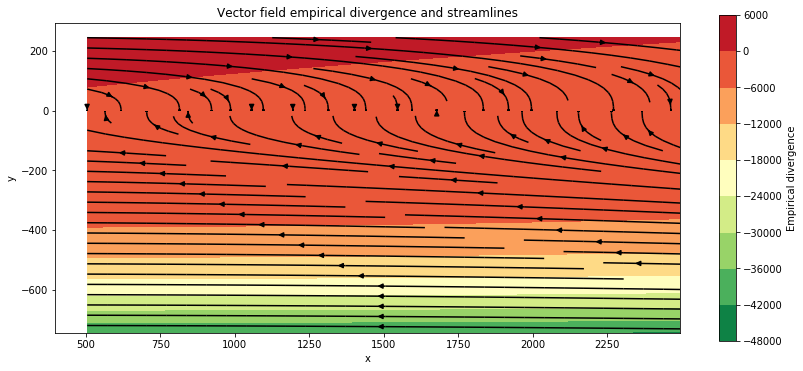

In [296]:
plt.figure(figsize=(14, 6))

plt.contourf(X, Y, div, cmap="RdYlGn_r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Empirical divergence')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field empirical divergence and streamlines')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We check whether the theoretical and the estimated divergence fields are close:

In [297]:
np.allclose(theor_div, div)

True

### theoretical curl module

The vector function is:

\begin{equation*}
 \vec{\mathbf{v}} = 0.0001 x y^3  \vec{\mathbf{i}} - 0.0002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}

therefore the theoretical curl module is:

\begin{equation*}
 curl = - 0.0004 x y - 0.0003 x y^2
\end{equation*}

so that the theoretical transfer function is:

In [298]:
def z_func_curl_mod(x, y):
    
    return - 0.0004 * x * y - 0.0003 * x * y**2

The theoretical divergence field can be created using the function expressing the analytical derivatives *z_func_div*:

In [299]:
theor_curl_mod = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_curl_mod)

In [300]:
print(theor_curl_mod)

[[  -9143.2775   -9324.3325   -9505.3875 ...  -44811.1125  -44992.1675
   -45173.2225]
 [  -8414.0575   -8580.6725   -8747.2875 ...  -41237.2125  -41403.8275
   -41570.4425]
 [  -7715.1375   -7867.9125   -8020.6875 ...  -37811.8125  -37964.5875
   -38117.3625]
 ...
 [ -79485.7375  -81059.7125  -82633.6875 ... -389558.8125 -391132.7875
  -392706.7625]
 [ -81695.6175  -83313.3525  -84931.0875 ... -400389.4125 -402007.1475
  -403624.8825]
 [ -83935.7975  -85597.8925  -87259.9875 ... -411368.5125 -413030.6075
  -414692.7025]]


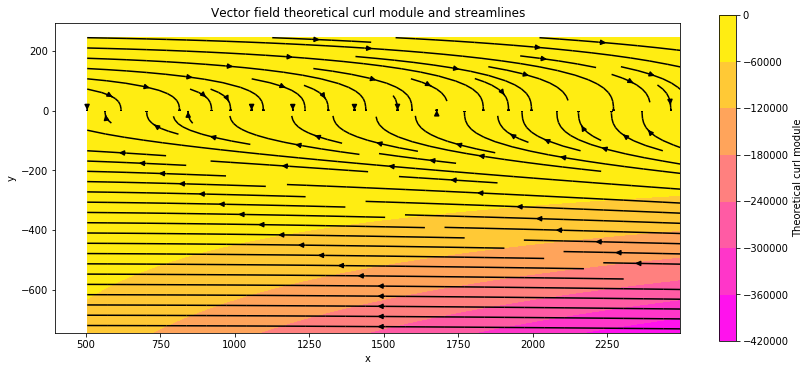

In [301]:
plt.figure(figsize=(14, 6))

plt.contourf(X, Y, theor_curl_mod, cmap="spring")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Theoretical curl module')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field theoretical curl module and streamlines')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### pygsf-estimated curl value

The module of curl as resulting from pygsf calculation is:

In [302]:
curl_module = curl_mod(
    fld_x=fx1, 
    fld_y=fy1, 
    cell_size_x=size_x, 
    cell_size_y=size_y)

In [303]:
print(curl_module)

[[  -9133.6675   -9314.0325   -9494.8875 ...  -44761.6125  -44942.4675
   -45122.8325]
 [  -8419.5775   -8585.8225   -8752.5375 ...  -41261.9625  -41428.6775
   -41594.9225]
 [  -7720.6375   -7873.0625   -8025.9375 ...  -37836.5625  -37989.4375
   -38141.8625]
 ...
 [ -79489.3375  -81064.8625  -82638.9375 ... -389583.5625 -391157.6375
  -392733.1625]
 [ -81699.1975  -83318.5025  -84936.3375 ... -400414.1625 -402031.9975
  -403651.3025]
 [ -83924.2075  -85587.5925  -87249.4875 ... -411319.0125 -412980.9075
  -414644.2925]]


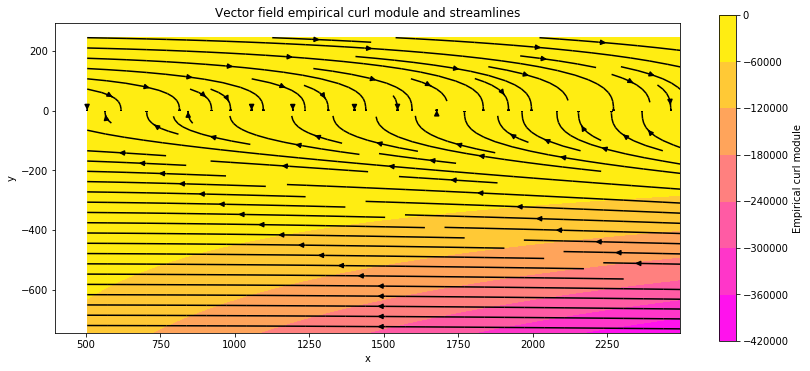

In [304]:
plt.figure(figsize=(14, 6))
plt.contourf(X, Y, theor_curl_mod, cmap="spring")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Empirical curl module')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field empirical curl module and streamlines')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We check whether the theoretical and the estimated curl module fields are close:

In [305]:
np.allclose(theor_curl_mod, curl_module)

False

We look at where there are significant differences between the theoretical and the empiric curl module fields, by calculating the percent difference between these two fields:

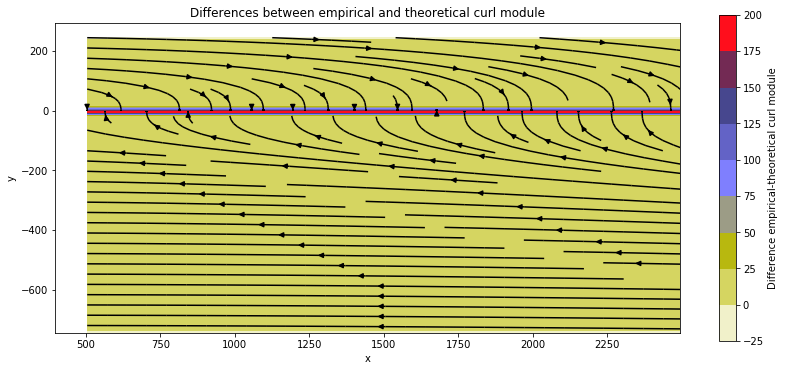

In [307]:
percent_diffs = 100.0*(curl_module - theor_curl_mod)/theor_curl_mod

plt.figure(figsize=(14, 6))

plt.contourf(X, Y, percent_diffs, cmap="gist_stern_r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Difference empirical-theoretical curl module')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Differences between empirical and theoretical curl module')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

While the majority of the empiric values are near the theoretical ones, there is an almost horizontal strip at around y = 0 where flows have singularities, with very high deviances (both negative and positive) that are related to the observed "singularity" of the v_x field gradient along the y axis.

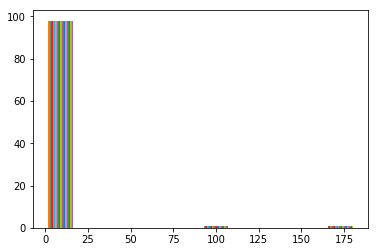

In [169]:
plt.hist(percent_diffs)  # arguments are passed to np.histogram
plt.show()

## Vector field parameters: example 2

We test another theoretical, 2D vector field, maintaining the same geotransform and other grid parameters as in the previous example. We use the field described in example 1 in [4]:

\begin{equation*}
 \vec{\mathbf{v}} = y  \vec{\mathbf{i}} - x  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}



The "transfer" functions from coordinates to z values are: 

In [170]:
def z_func_fx(x, y):

    return y

def z_func_fy(x, y):

    return - x

### geotransform and grid definitions

Gridded field values are calculated for the theoretical source vector field x- and y- components using the provided number of rows and columns for the grid:

In [171]:
rows=200; cols=200

In [172]:
size_x = 10; size_y = 10

In [173]:
tlx = -1000.0; tly = 1000.0 

Arrays components are defined in terms of indices *i* and *j*, so to transform array indices to geographical coordinates we use a geotransform. The one chosen is:

In [174]:
gt1 = GeoTransform(
    inTopLeftX=tlx, 
    inTopLeftY=tly, 
    inPixWidth=size_x, 
    inPixHeight=size_y)

Note that the chosen geotransform has no axis rotation, as is in the most part of cases with geographic grids.

### vector field x-component

In [175]:
fx2 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fx)

In [176]:
print(fx2)

[[ 995.  995.  995. ...  995.  995.  995.]
 [ 985.  985.  985. ...  985.  985.  985.]
 [ 975.  975.  975. ...  975.  975.  975.]
 ...
 [-975. -975. -975. ... -975. -975. -975.]
 [-985. -985. -985. ... -985. -985. -985.]
 [-995. -995. -995. ... -995. -995. -995.]]


### vector field y-component

In [177]:
fy2 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fy)

In [178]:
print(fy2)

[[ 995.  985.  975. ... -975. -985. -995.]
 [ 995.  985.  975. ... -975. -985. -995.]
 [ 995.  985.  975. ... -975. -985. -995.]
 ...
 [ 995.  985.  975. ... -975. -985. -995.]
 [ 995.  985.  975. ... -975. -985. -995.]
 [ 995.  985.  975. ... -975. -985. -995.]]


### flow visualization

We visualize the parameters of the flow.

The geographic coordinates are:

In [179]:
X, Y = gtToXY(
    gt=gt1,
    num_rows=rows,
    num_cols=cols)

The vector field magnitude is:

In [180]:
magn = magnitude_2D(
    fld_x=fx2, 
    fld_y=fy2)

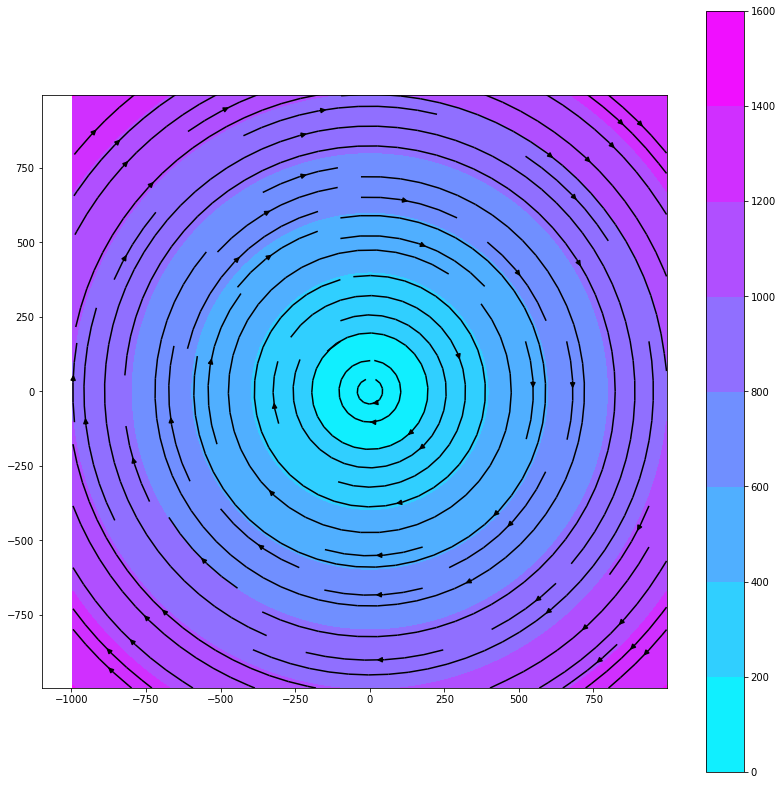

In [181]:
plt.figure(figsize=(14, 14))

plt.contourf(X, Y, magn, cmap="cool")
plt.colorbar()
plt.streamplot(X, Y, fx2/magn, fy2/magn, color="black")
plt.axis("image")

plt.show()

### theoretical curl module

The theoretical curl module is a constant value:

\begin{equation*}
 curl = -2
\end{equation*}

### pygsf-estimated module of curl

The module of curl as resulting from pygsf calculation is:

In [182]:
curl_module = curl_mod(
    fld_x=fx2, 
    fld_y=fy2, 
    cell_size_x=size_x, 
    cell_size_y=size_y)

In [183]:
print(curl_module)

[[-2. -2. -2. ... -2. -2. -2.]
 [-2. -2. -2. ... -2. -2. -2.]
 [-2. -2. -2. ... -2. -2. -2.]
 ...
 [-2. -2. -2. ... -2. -2. -2.]
 [-2. -2. -2. ... -2. -2. -2.]
 [-2. -2. -2. ... -2. -2. -2.]]


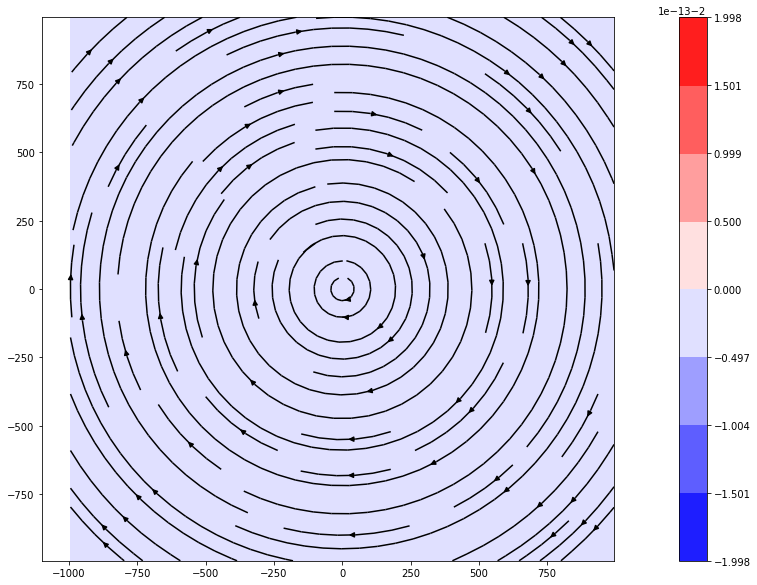

In [184]:
plt.figure(figsize=(14, 10))

plt.contourf(X, Y, curl_module, cmap="bwr")
plt.colorbar()
plt.streamplot(X, Y, fx2/magn, fy2/magn, color="black")
plt.axis("image")

plt.show()

We check whether the theoretical and the estimated curl module fields are close:

In [185]:
np.allclose(-2.0, curl_module)

True

Deviances from the expected value are reduced, as evidenced by the histogram:

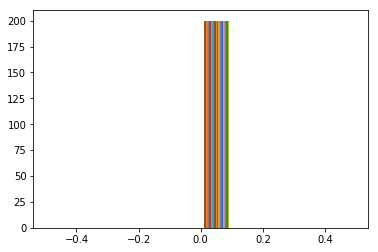

In [186]:
plt.hist(curl_module + 2.0)  # arguments are passed to np.histogram
plt.show()

### References

[1] Visually appealing ways to plot singular vector fields with matplotlib or other foss tools. https://scicomp.stackexchange.com/questions/18760/visually-appealing-ways-to-plot-singular-vector-fields-with-matplotlib-or-other

[2] Curl Function (Solution). http://www.johnny-lin.com/ams2011/sc/arrays_io/as/hide/py-curl-soln.shtml. Consulted on June 4, 2018.


[3] M. R. Spiegel, 1975. Analisi Vettoriale. Etas Libri, pp. 224.


[4] Curl (mathematics). https://en.wikipedia.org/wiki/Curl_(mathematics). Consulted on June 6, 2018.